# Housing Prices and Turkiye



### Name: Ayman Amer Abdulhafed Alkubati


## Data Manipulation

In [12]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("/Users/aymanamer/Downloads/OECD.ECO.MPD,DSD_AN_HOUSE_PRICES.csv")

In [14]:
df.head()

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,FREQ,Frequency of observation,MEASURE,Measure,...,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,ADJUSTMENT,Adjustment,DECIMALS,Decimals,BASE_PER,Base period
0,DATAFLOW,OECD.ECO.MPD:DSD_AN_HOUSE_PRICES@DF_HOUSE_PRIC...,Analytical house prices indicators,I,GBR,United Kingdom,A,Annual,RHP,Real house price indices,...,A,Normal value,0,Units,S,"Seasonally adjusted, not calendar adjusted",1,One,2015,NaN
1,DATAFLOW,OECD.ECO.MPD:DSD_AN_HOUSE_PRICES@DF_HOUSE_PRIC...,Analytical house prices indicators,I,GBR,United Kingdom,A,Annual,RHP,Real house price indices,...,A,Normal value,0,Units,S,"Seasonally adjusted, not calendar adjusted",1,One,2015,NaN
2,DATAFLOW,OECD.ECO.MPD:DSD_AN_HOUSE_PRICES@DF_HOUSE_PRIC...,Analytical house prices indicators,I,GBR,United Kingdom,A,Annual,RHP,Real house price indices,...,A,Normal value,0,Units,S,"Seasonally adjusted, not calendar adjusted",1,One,2015,NaN
3,DATAFLOW,OECD.ECO.MPD:DSD_AN_HOUSE_PRICES@DF_HOUSE_PRIC...,Analytical house prices indicators,I,GBR,United Kingdom,A,Annual,RHP,Real house price indices,...,A,Normal value,0,Units,S,"Seasonally adjusted, not calendar adjusted",1,One,2015,NaN
4,DATAFLOW,OECD.ECO.MPD:DSD_AN_HOUSE_PRICES@DF_HOUSE_PRIC...,Analytical house prices indicators,I,GBR,United Kingdom,A,Annual,RHP,Real house price indices,...,A,Normal value,0,Units,S,"Seasonally adjusted, not calendar adjusted",1,One,2015,NaN


In [15]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
STRUCTURE                      0
STRUCTURE_ID                   0
STRUCTURE_NAME                 0
ACTION                         0
REF_AREA                       0
Reference area                 0
FREQ                           0
Frequency of observation       0
MEASURE                        0
Measure                        0
UNIT_MEASURE                   0
Unit of measure                0
TIME_PERIOD                    0
Time period                 3503
OBS_VALUE                      0
Observation value           3503
OBS_STATUS                     0
Observation status             0
UNIT_MULT                      0
Unit multiplier                0
ADJUSTMENT                     0
Adjustment                     0
DECIMALS                       0
Decimals                       0
BASE_PER                       0
Base period                 3503
dtype: int64


In [16]:
relevant_columns = ['Reference area', 'Measure', 'TIME_PERIOD', 'OBS_VALUE']
cleaned_df = df[relevant_columns]

In [22]:
cleaned_df.head()

,Reference area,Measure,TIME_PERIOD,OBS_VALUE
0,United Kingdom,Real house price indices,2023,112.741925
1,United Kingdom,Real house price indices,2022,119.796497
2,United Kingdom,Real house price indices,2021,118.087700
3,United Kingdom,Real house price indices,2020,111.570254
4,United Kingdom,Real house price indices,2019,109.138680


In [24]:
# Dropping Occupied Palestine data that is called "Israel" here
cleaned_df[cleaned_df["Reference area"] != "Israel"]

,Reference area,Measure,TIME_PERIOD,OBS_VALUE
0,United Kingdom,Real house price indices,2023,112.741925
1,United Kingdom,Real house price indices,2022,119.796497
2,United Kingdom,Real house price indices,2021,118.087700
3,United Kingdom,Real house price indices,2020,111.570254
4,United Kingdom,Real house price indices,2019,109.138680
...,...,...,...,...
3498,Slovak Republic,Price to rent ratio,2009,104.236009
3499,Slovak Republic,Price to rent ratio,2008,125.969574
3500,Slovak Republic,Price to rent ratio,2007,109.504760
3501,Slovak Republic,Price to rent ratio,2006,88.354093


In [26]:
# Sort data by 'Reference area' and 'TIME_PERIOD'
cleaned_df = cleaned_df.sort_values(by=['Reference area', 'TIME_PERIOD'])

# Calculate the year-over-year percentage increase in housing prices
cleaned_df['PCT_CHANGE'] = cleaned_df.groupby('Reference area')['OBS_VALUE'].pct_change() * 100

# Display the first 10 rows to verify the new column
print(cleaned_df.head(10))

     Reference area                   Measure  TIME_PERIOD  OBS_VALUE  \
1312      Australia       Price to rent ratio         2004  87.154352   
1990      Australia     Price to income ratio         2004  91.063085   
2300      Australia  Real house price indices         2004  72.157761   
2453      Australia               Rent prices         2004  63.855978   
1311      Australia       Price to rent ratio         2005  86.824010   
1989      Australia     Price to income ratio         2005  88.206889   
2299      Australia  Real house price indices         2005  71.923233   
2452      Australia               Rent prices         2005  65.268923   
1310      Australia       Price to rent ratio         2006  89.890095   
1988      Australia     Price to income ratio         2006  89.660886   

      PCT_CHANGE  
1312         NaN  
1990    4.484840  
2300  -20.760689  
2453  -11.505046  
1311   35.968491  
1989    1.592739  
2299  -18.460753  
2452   -9.251962  
1310   37.722657  
1988  

In [28]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3503 entries, 1312 to 3200
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Reference area  3503 non-null   object 
 1   Measure         3503 non-null   object 
 2   TIME_PERIOD     3503 non-null   int64  
 3   OBS_VALUE       3503 non-null   float64
 4   PCT_CHANGE      3452 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 164.2+ KB


In [30]:
cleaned_df.describe()

,TIME_PERIOD,OBS_VALUE,PCT_CHANGE
count,3503.000000,3503.000000,3452.000000
mean,2013.612332,105.087435,2.514874
std,5.691366,21.762018,21.497329
min,1997.000000,22.991673,-88.198112
25%,2009.000000,94.034917,-5.681363
50%,2014.000000,102.200748,0.000000
75%,2019.000000,114.122893,6.842854
max,2023.000000,405.044405,329.325711


In [31]:
# Get unique values in the 'MEASURE' column
unique_measures = cleaned_df['Measure'].unique()

# Print the unique values
print(unique_measures)

['Price to rent ratio' 'Price to income ratio' 'Real house price indices'
 'Rent prices']


In [34]:
# Filter data for 'Real house price indices'
house_price_data = cleaned_df[cleaned_df['Measure'] == 'Real house price indices']

# Group by 'TIME_PERIOD' and 'Reference area' and calculate the mean of OBS_VALUE
grouped_data = house_price_data.groupby(['TIME_PERIOD', 'Reference area'])['OBS_VALUE'].mean().reset_index()

# Identify the highest and lowest housing prices for each year
highest_prices = grouped_data.loc[grouped_data.groupby('TIME_PERIOD')['OBS_VALUE'].idxmax()]
lowest_prices = grouped_data.loc[grouped_data.groupby('TIME_PERIOD')['OBS_VALUE'].idxmin()]

print("Highest housing prices each year:")
print(highest_prices)

print("Lowest housing prices each year:")
print(lowest_prices)


Highest housing prices each year:
     TIME_PERIOD Reference area   OBS_VALUE
3           2003    Netherlands  115.756492
19          2004      Indonesia  150.646240
52          2005         Greece  150.879372
90          2006         Greece  165.508511
130         2007         Greece  169.241668
194         2008         Russia  173.936604
240         2009        Romania  159.322820
268         2010         Greece  150.515489
317         2011         Greece  138.203254
351         2012         Brazil  123.386870
436         2013         Russia  116.629139
485         2014         Russia  111.399664
496         2015      Australia  100.000000
579         2016    New Zealand  113.438310
616         2017        Iceland  131.148798
666         2018        Iceland  137.725452
715         2019        Hungary  150.936423
765         2020        Hungary  153.272500
815         2021        Hungary  167.963628
865         2022        Hungary  178.497408
937         2023        Türkiye  194.50941

In [36]:
# Pivot the data to create separate columns for each measure
turkiye_pivot = cleaned_df[cleaned_df['Reference area'] == 'Türkiye'].pivot_table(index='TIME_PERIOD', columns='Measure', values='OBS_VALUE')

# Group by 'Reference area' (country) and calculate summary statistics
turkiye_grouped = turkiye_pivot.agg(['mean', 'median', 'min', 'max'])

# Get the index year corresponding to the minimum and maximum values for each measure
min_years = turkiye_pivot.idxmin()
max_years = turkiye_pivot.idxmax()

# Display the grouped data
print(turkiye_grouped)

# Display the minimum and maximum years for each measure
print("\nMinimum Years:")
print(min_years)
print("\nMaximum Years:")
print(max_years)

Measure  Price to rent ratio  Real house price indices  Rent prices
mean              124.997616                106.993237   114.595549
median            101.900117                 99.465710    89.920619
min                78.146231                 83.222268    34.663767
max               299.827179                194.509416   405.044405

Minimum Years:
Measure
Price to rent ratio         2010
Real house price indices    2011
Rent prices                 2004
dtype: int64

Maximum Years:
Measure
Price to rent ratio         2023
Real house price indices    2023
Rent prices                 2023
dtype: int64


## Data Visualizatoin

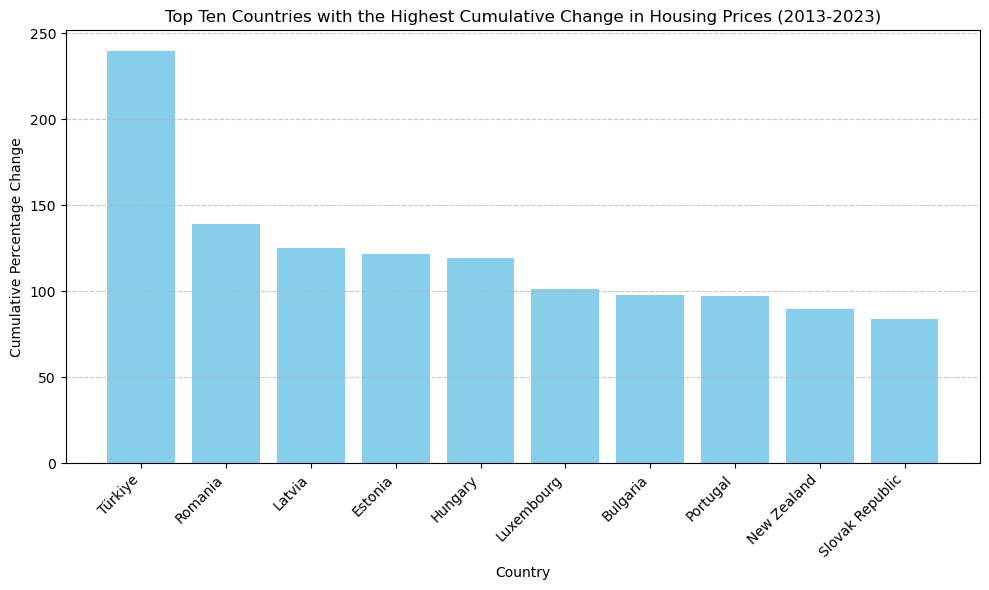

In [47]:
# Filter the data for the past ten years
recent_data = cleaned_df[cleaned_df['TIME_PERIOD'] >= 2013]

# Group the data by 'Reference area' (country) and calculate the total percentage change in housing prices
country_housing_change = recent_data.groupby('Reference area')['PCT_CHANGE'].sum()

# Sort the countries by total percentage change and select the top five
top_ten_countries = country_housing_change.nlargest(10)

# Plot the top five countries
plt.figure(figsize=(10, 6))
plt.bar(top_ten_countries.index, top_ten_countries.values, color='skyblue')
plt.title('Top Ten Countries with the Highest Cumulative Change in Housing Prices (2013-2023)')
plt.xlabel('Country')
plt.ylabel('Cumulative Percentage Change')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

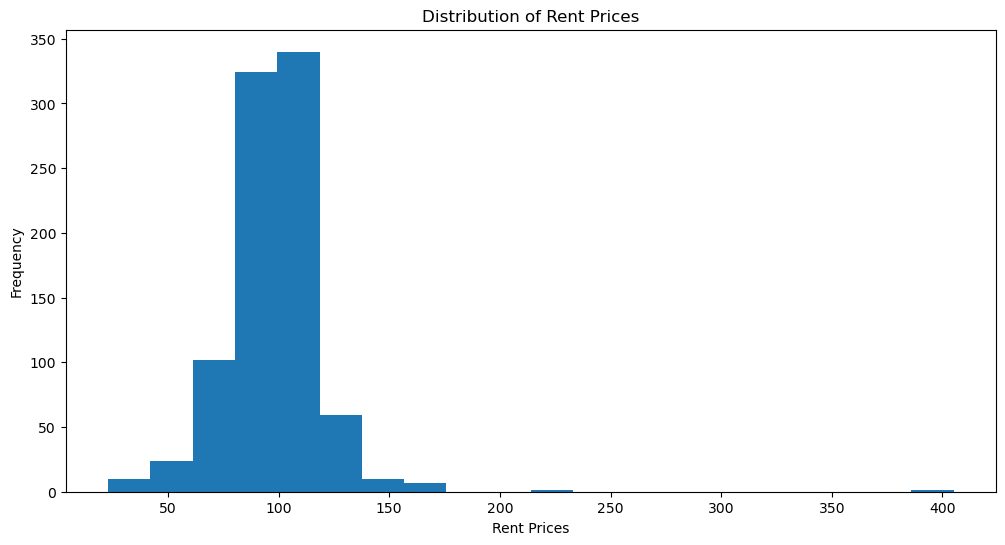

In [49]:
# Histogram plot
plt.figure(figsize=(12, 6))
plt.hist(cleaned_df[cleaned_df['Measure'] == 'Rent prices']['OBS_VALUE'], bins=20)
plt.xlabel('Rent Prices')
plt.ylabel('Frequency')
plt.title('Distribution of Rent Prices')
plt.show()

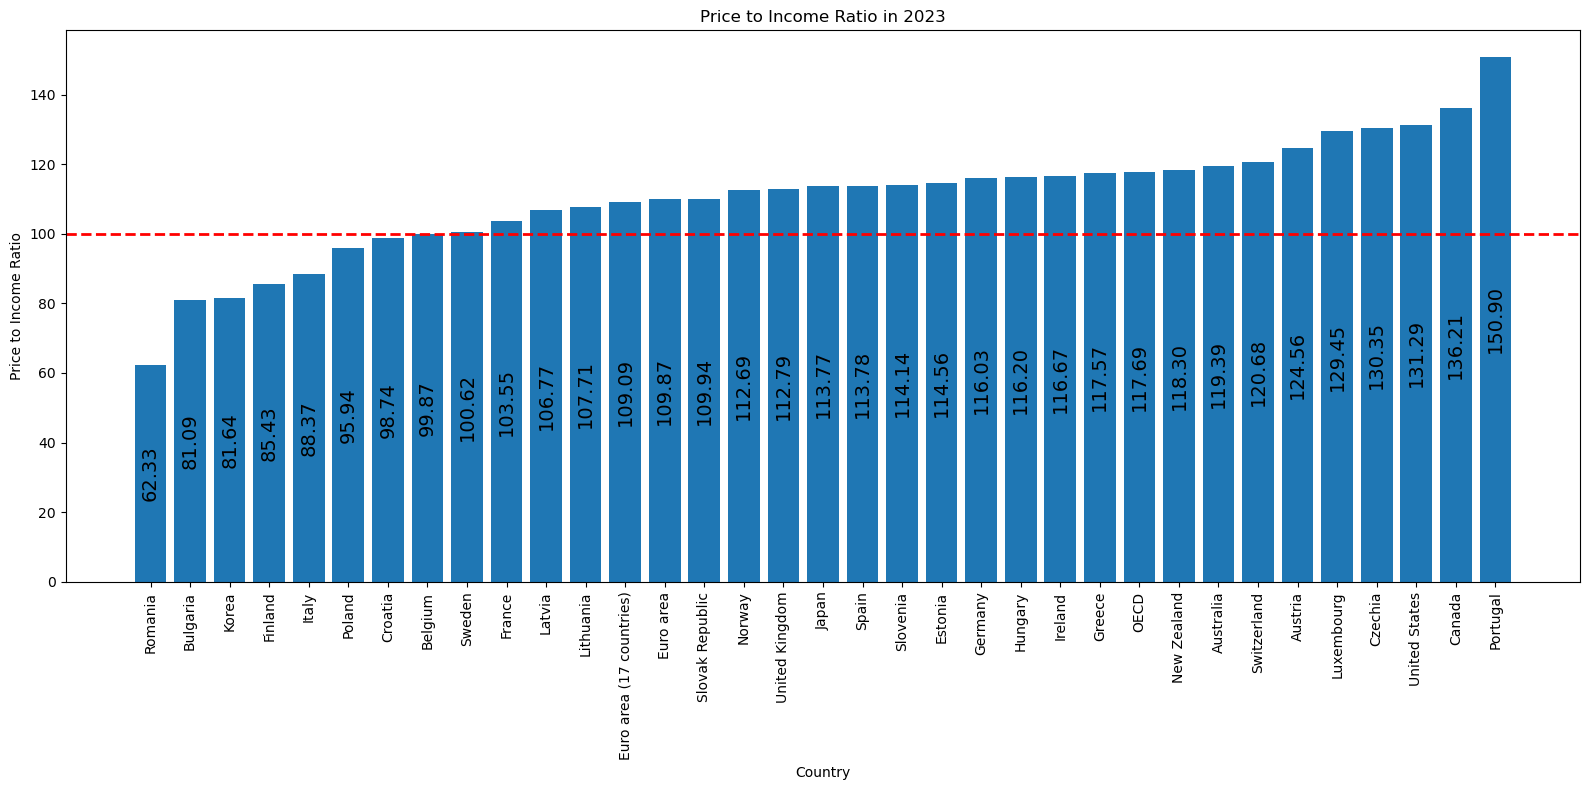

In [51]:
# Bar plot for 2023
year = 2023
bar_data = cleaned_df[(cleaned_df['TIME_PERIOD'] == year) & (cleaned_df['Measure'] == 'Price to income ratio')]

# Pivot the data and sort by 'Price to income ratio' values
pivoted_data = bar_data.pivot(index='Reference area', columns='Measure', values='OBS_VALUE')
sorted_data = pivoted_data.sort_values(by='Price to income ratio', ascending=True)

plt.figure(figsize=(16, 8))
bars = plt.bar(sorted_data.index, sorted_data['Price to income ratio'])

plt.axhline(y=100, color='r', linestyle='--', linewidth=2)  # Add a central line at index level (assumed 100)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.2f}', ha='center', va='center', rotation='vertical', fontsize=14)

plt.xlabel('Country')
plt.ylabel('Price to Income Ratio')
plt.title(f'Price to Income Ratio in {year}')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

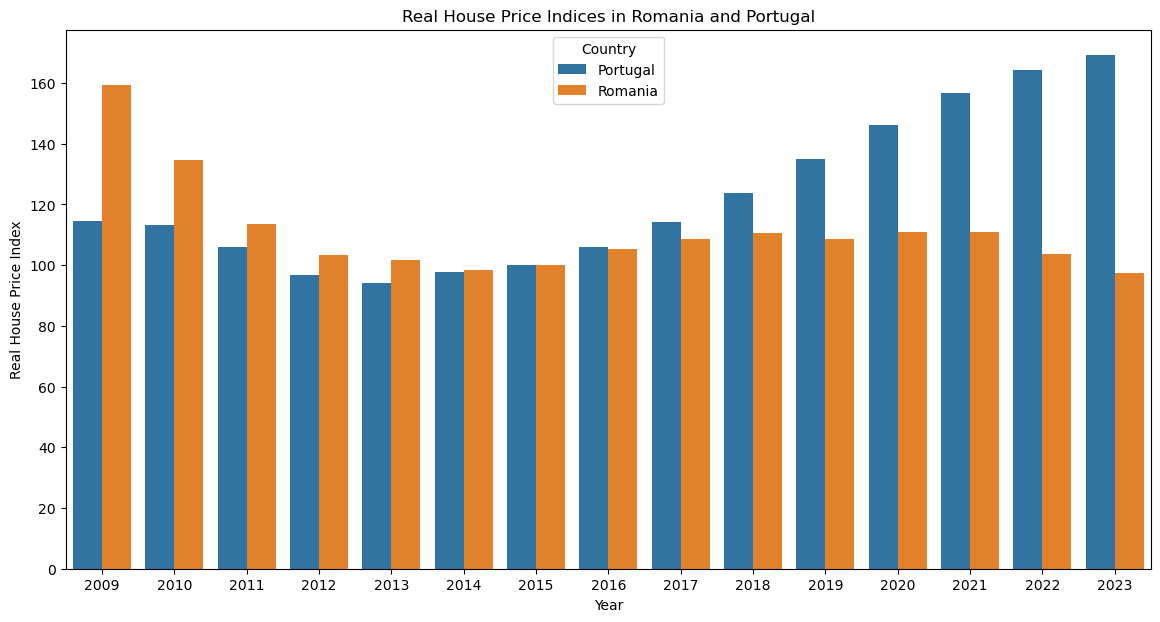

In [52]:
# Filter data for Real house price indices and Price to income ratio for Romania and Portugal
filtered_data = cleaned_df[(cleaned_df['Measure'].isin(['Real house price indices', 'Price to income ratio'])) &
                           (cleaned_df['Reference area'].isin(['Romania', 'Portugal']))]

# Exclude the years 2004 to 2008 due to lack of data
filtered_data = filtered_data[~filtered_data['TIME_PERIOD'].between(2004, 2008)]

rhpi_data = filtered_data[filtered_data['Measure'] == 'Real house price indices']

# Create bar plot for Real house price indices
plt.figure(figsize=(14, 7))
sns.barplot(data=rhpi_data, x='TIME_PERIOD', y='OBS_VALUE', hue='Reference area')
plt.xlabel('Year')
plt.ylabel('Real House Price Index')
plt.title('Real House Price Indices in Romania and Portugal')
plt.legend(title='Country')
plt.show()

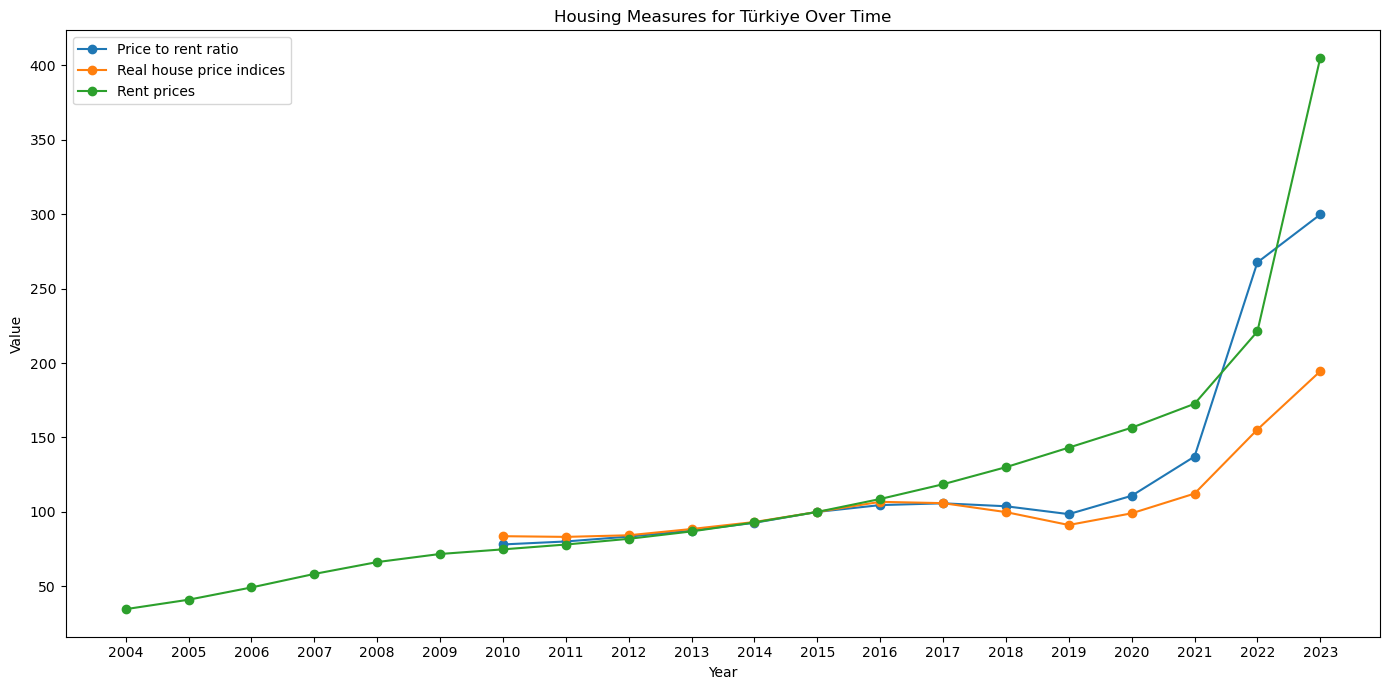

In [54]:
# Filter data for Türkiye
turkiye_data = cleaned_df[cleaned_df['Reference area'] == 'Türkiye']

# Pivot the data to have measures as columns
pivot_turkiye = turkiye_data.pivot(index='TIME_PERIOD', columns='Measure', values='OBS_VALUE')

# Plot the data
plt.figure(figsize=(14, 7))
for measure in pivot_turkiye.columns:
    plt.plot(pivot_turkiye.index, pivot_turkiye[measure], marker='o', label=measure)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Housing Measures for Türkiye Over Time')
plt.xticks(pivot_turkiye.index.astype(int))
plt.legend()
plt.tight_layout()
plt.show()

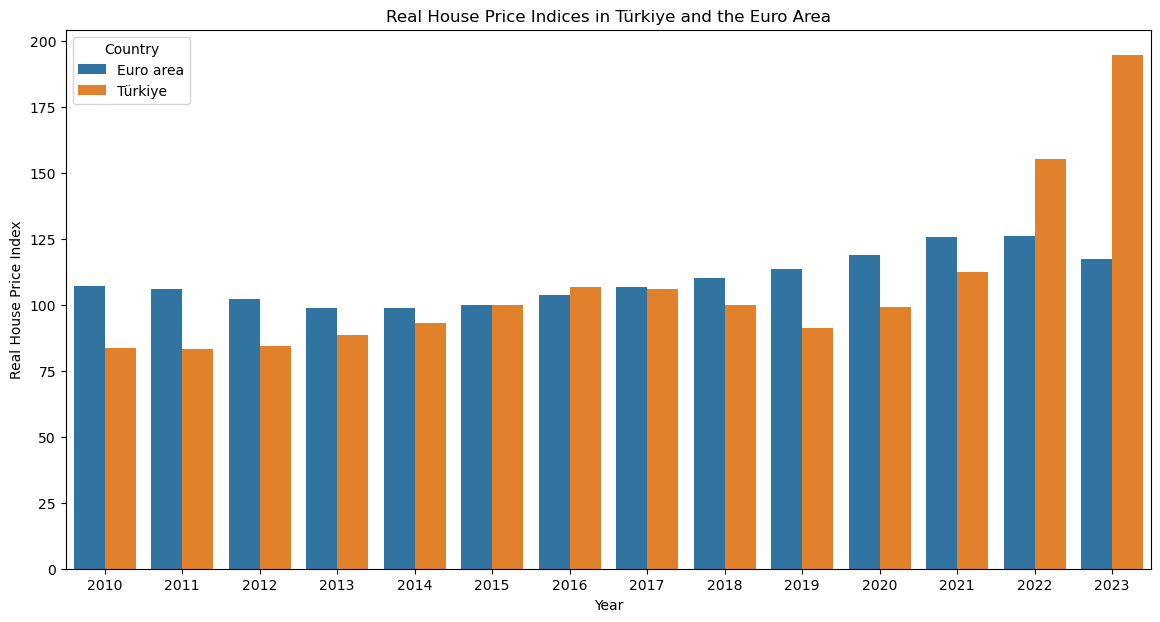

In [56]:
# Filter data for Real house price indices for Türkiye and the US
rhpi_data = cleaned_df[(cleaned_df['Measure'] == 'Real house price indices') &
                       (cleaned_df['Reference area'].isin(['Türkiye', 'Euro area']))]

rhpi_data = rhpi_data[~rhpi_data['TIME_PERIOD'].between(2004, 2009)]
# Create bar plot for Real house price indices
plt.figure(figsize=(14, 7))
sns.barplot(data=rhpi_data, x='TIME_PERIOD', y='OBS_VALUE', hue='Reference area')
plt.xlabel('Year')
plt.ylabel('Real House Price Index')
plt.title('Real House Price Indices in Türkiye and the Euro Area')
plt.legend(title='Country')
plt.show()

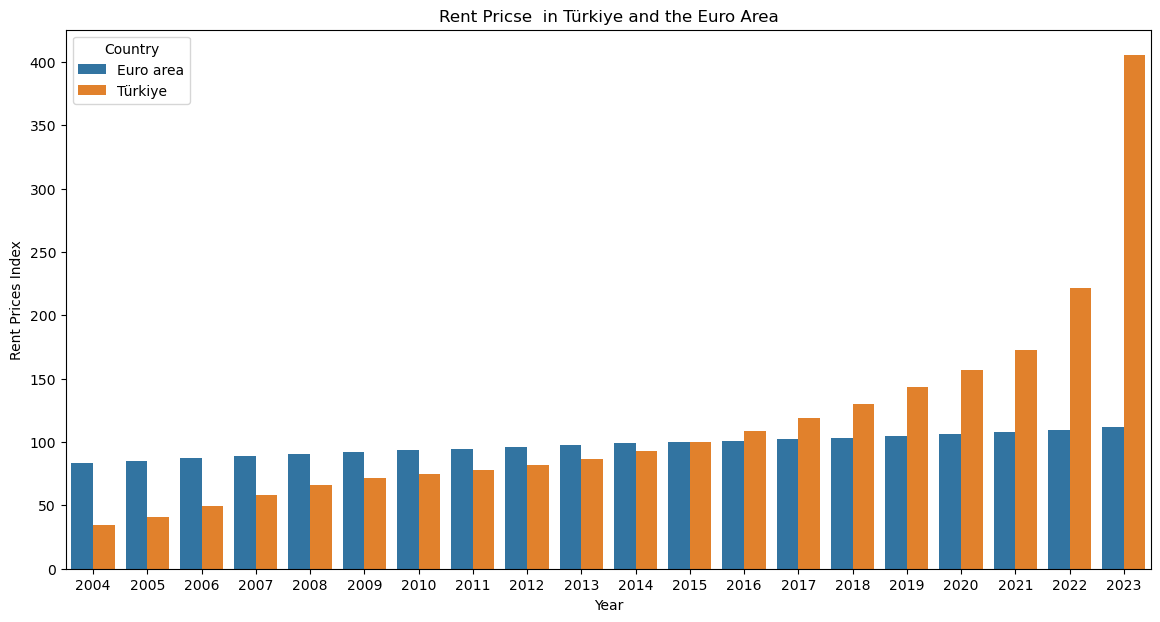

In [59]:
# Filter data for Real house price indices for Türkiye and the Euro area
rhpi_data = cleaned_df[(cleaned_df['Measure'] == 'Rent prices') &
                       (cleaned_df['Reference area'].isin(['Türkiye', 'Euro area']))]

# Create bar plot for Real house price indices
plt.figure(figsize=(14, 7))
sns.barplot(data=rhpi_data, x='TIME_PERIOD', y='OBS_VALUE', hue='Reference area')
plt.xlabel('Year')
plt.ylabel('Rent Prices Index')
plt.title('Rent Pricse  in Türkiye and the Euro Area')
plt.legend(title='Country')
plt.show()

<Figure size 1400x700 with 0 Axes>

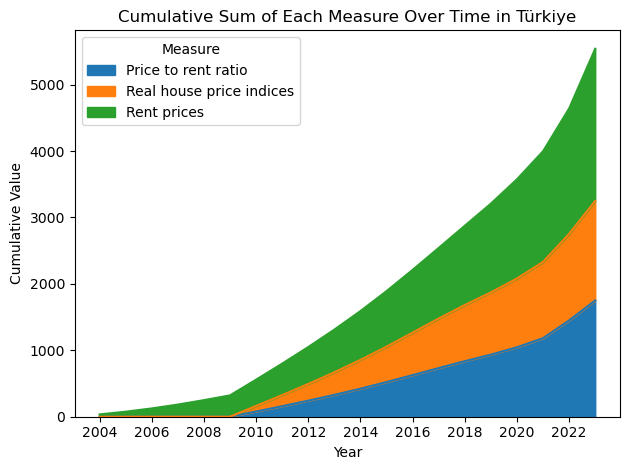

In [61]:
# Pivot the data to have measures as columns
pivot_turkiye = turkiye_data.pivot(index='TIME_PERIOD', columns='Measure', values='OBS_VALUE')

# Calculate the cumulative sum for each measure
cumulative_data = pivot_turkiye.cumsum()

# Plot the cumulative sum data
plt.figure(figsize=(14, 7))
cumulative_data.plot.area()

plt.xlabel('Year')
plt.ylabel('Cumulative Value')
plt.title('Cumulative Sum of Each Measure Over Time in Türkiye')
plt.xticks(cumulative_data.index.astype(int)[::2])
plt.legend(title='Measure')
plt.tight_layout()
plt.show()

In [77]:
rhpi_data_Turkiye = cleaned_df[(cleaned_df['Measure'] == 'Real house price indices') &
                       (cleaned_df['Reference area'].isin(['Türkiye']))]

def count_increase_decrease(data):
    data = data.sort_values('TIME_PERIOD')
    increase_count = 0
    decrease_count = 0
    
    for i in range(1, len(data)):
        current_value = data.iloc[i]['OBS_VALUE']
        previous_value = data.iloc[i-1]['OBS_VALUE']
        
        if current_value > previous_value:
            increase_count += 1
        elif current_value < previous_value:
            decrease_count += 1
    
    return increase_count, decrease_count

increase_count, decrease_count = count_increase_decrease(rhpi_data_Turkiye)


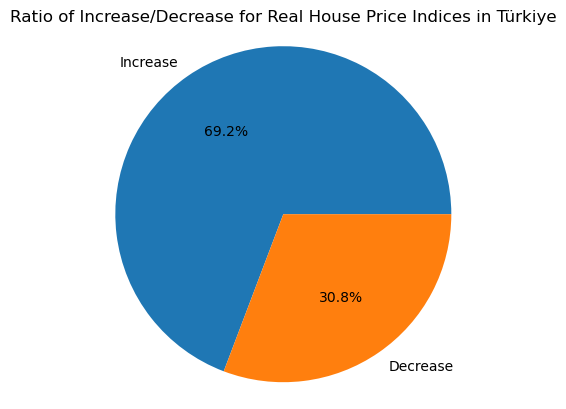

In [81]:
labels = ['Increase', 'Decrease']
sizes = [increase_count, decrease_count]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Ratio of Increase/Decrease for Real House Price Indices in Türkiye')

plt.show()